In [16]:
"""!pip install ffn
!pip install pypfopt
!pip install empyrical"""

'!pip install ffn\n!pip install pypfopt\n!pip install empyrical'

In [17]:
#pip install seaborn



In [18]:
#pip install skforecast

In [19]:
import ffn

import numpy as np
import pandas as pd
#from empyrical import alpha_beta
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import warnings
plt.style.use('dark_background')
#warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [20]:

folder = '../data/'
file = 'ffn.csv'
filename = f"{folder}{file}"
isin='LU0843168575'
filename

isins=['LU0280438135','LU0255977372','LU0133806785']

In [21]:
isins = ['LU0340554673','LU0474966677','LU0386875149']
filename = 'portfolios/ptf_20062022155004.csv'
prices = ffn.get(f'{isins[0]},{isins[1]},{isins[2]}', provider=ffn.data.csv, path=filename)
prices


,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,370.96,138.50,269.42
2019-06-17,373.09,138.20,270.13
2019-06-18,380.18,138.10,274.36
2019-06-19,378.92,140.05,273.91
2019-06-20,382.68,140.01,276.10
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


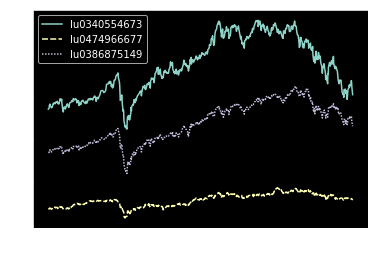

In [22]:
sns.lineplot(data=prices)
plt.show()

In [23]:
#prices = ffn.get('TTWO, CCOEY, EA', start='2019-01-01')
#benchmark = ffn.get(f'{isins[0]}-level',provider=ffn.data.csv, path=filename)
#ax = prices.rebase().plot(figsize=(12,5))
#plt.show()

In [24]:
prices

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,370.96,138.50,269.42
2019-06-17,373.09,138.20,270.13
2019-06-18,380.18,138.10,274.36
2019-06-19,378.92,140.05,273.91
2019-06-20,382.68,140.01,276.10
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


<module 'matplotlib.pyplot' from '/Users/darylfelix/MachineLearning/pamdigital-kit-backend/src/Python/pam.simulator/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

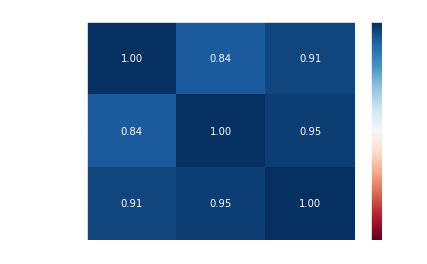

In [25]:
prices.plot_corr_heatmap()

In [26]:
ffn.core.to_drawdown_series(prices)

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,0.000000,0.000000,0.000000
2019-06-17,0.000000,-0.002166,0.000000
2019-06-18,0.000000,-0.002888,0.000000
2019-06-19,-0.003314,0.000000,-0.001640
2019-06-20,0.000000,-0.000286,0.000000
...,...,...,...
2022-06-07,-0.259652,-0.137004,-0.170221
2022-06-08,-0.243590,-0.136310,-0.163349
2022-06-09,-0.247653,-0.135190,-0.170410


In [27]:
returns = prices.to_returns().dropna()

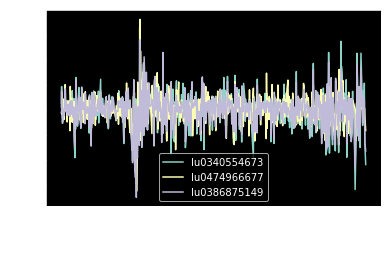

In [28]:
returns.plot()
plt.show()

In [29]:
stats = prices.calc_stats()
stats.display()

Stat                 lu0340554673    lu0474966677    lu0386875149
-------------------  --------------  --------------  --------------
Start                2019-06-14      2019-06-14      2019-06-14
End                  2022-06-13      2022-06-13      2022-06-13
Risk-free rate       0.00%           0.00%           0.00%

Total Return         9.07%           14.53%          22.83%
Daily Sharpe         0.25            0.37            0.48
Daily Sortino        0.40            0.62            0.74
CAGR                 2.94%           4.63%           7.10%
Max Drawdown         -31.93%         -26.86%         -32.25%
Calmar Ratio         0.09            0.17            0.22

MTD                  -3.90%          -3.45%          -5.48%
3m                   -8.26%          -2.44%          -7.60%
6m                   -23.47%         -12.11%         -19.18%
YTD                  -23.91%         -11.36%         -20.61%
1Y                   -26.09%         -6.09%          -12.81%
3Y (ann.)           

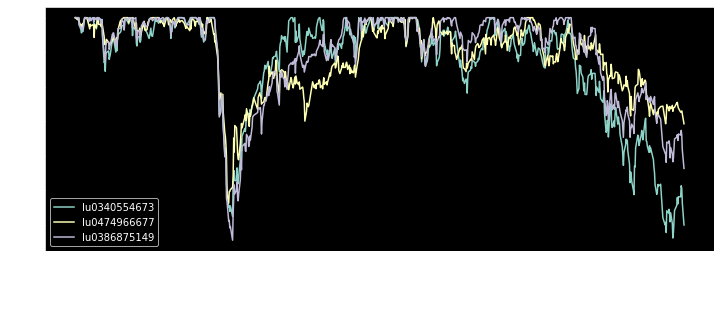

In [30]:
stats.prices.to_drawdown_series().plot(figsize=(12,5))
plt.show()

In [31]:
stats.prices.calc_cagr()

lu0340554673    0.029378
lu0474966677    0.046284
lu0386875149    0.071010
dtype: float64

In [32]:
returns = prices.to_log_returns().dropna()
returns.calc_mean_var_weights().as_format('.2%')

lu0340554673     0.00%
lu0474966677    35.14%
lu0386875149    64.86%
dtype: object

In [33]:
returns.calc_erc_weights().as_format('.2%')

lu0340554673    27.77%
lu0474966677    41.36%
lu0386875149    30.87%
Name: erc, dtype: object

symbols = [f'{isin}-NAV']
for sym in symbols:
    stk = ffn.get(sym, provider=ffn.data.csv, path=filename)
    alpha, beta = alpha_beta(stk, benchmark)
    print(sym, beta)


In [34]:
returns = prices.pct_change()
weight = np.array([10,10,10])

t = np.sum(weight)
weights = weight/t
# mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print("Expected annualised return: " + str(portfolio_return*100))
print("Volatility: " + str(portfolio_std_dev*100))

Expected annualised return: 7.000000000000001
Volatility: 17.0


In [35]:
portfolio_return

0.07

In [36]:
mean_daily_returns

lu0340554673    0.000222
lu0474966677    0.000258
lu0386875149    0.000375
dtype: float64

In [37]:
returns

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,NaN,NaN,NaN
2019-06-17,0.005742,-0.002166,0.002635
2019-06-18,0.019003,-0.000724,0.015659
2019-06-19,-0.003314,0.014120,-0.001640
2019-06-20,0.009923,-0.000286,0.007995
...,...,...,...
2022-06-07,-0.000327,-0.006693,-0.002017
2022-06-08,0.021696,0.000804,0.008282
2022-06-09,-0.005372,0.001297,-0.008440


In [38]:
portfolio_return

0.07

In [39]:
prices.iloc[0]

lu0340554673    370.96
lu0474966677    138.50
lu0386875149    269.42
Name: 2019-06-14 00:00:00, dtype: float64

In [40]:
#pip install PyPortfolioOpt

In [41]:
prices

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,370.96,138.50,269.42
2019-06-17,373.09,138.20,270.13
2019-06-18,380.18,138.10,274.36
2019-06-19,378.92,140.05,273.91
2019-06-20,382.68,140.01,276.10
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


In [42]:
x=ffn.core.drawdown_details(ffn.core.calc_max_drawdown(prices))

In [43]:
ffn.core.GroupStats(prices).display()

Stat                 lu0340554673    lu0474966677    lu0386875149
-------------------  --------------  --------------  --------------
Start                2019-06-14      2019-06-14      2019-06-14
End                  2022-06-13      2022-06-13      2022-06-13
Risk-free rate       0.00%           0.00%           0.00%

Total Return         9.07%           14.53%          22.83%
Daily Sharpe         0.25            0.37            0.48
Daily Sortino        0.40            0.62            0.74
CAGR                 2.94%           4.63%           7.10%
Max Drawdown         -31.93%         -26.86%         -32.25%
Calmar Ratio         0.09            0.17            0.22

MTD                  -3.90%          -3.45%          -5.48%
3m                   -8.26%          -2.44%          -7.60%
6m                   -23.47%         -12.11%         -19.18%
YTD                  -23.91%         -11.36%         -20.61%
1Y                   -26.09%         -6.09%          -12.81%
3Y (ann.)           

In [44]:
100*((1*(106.56/100))+(1*(229.62/100))+(1*(80.63/100))-3)

116.81000000000009

In [45]:
(((1*(106.56/100)))+1)+(((1*(229.62/100)))+1)+(((1*(80.63/100)))+1)-3


4.168100000000001

In [46]:
(((1*(229.62/100)))+1)/3

1.0987333333333333

In [47]:
((1*(80.63/100)))+1

1.8062999999999998

In [48]:
pf?

Object `pf` not found.


In [49]:
prices

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,370.96,138.50,269.42
2019-06-17,373.09,138.20,270.13
2019-06-18,380.18,138.10,274.36
2019-06-19,378.92,140.05,273.91
2019-06-20,382.68,140.01,276.10
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


In [50]:
returns 

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,NaN,NaN,NaN
2019-06-17,0.005742,-0.002166,0.002635
2019-06-18,0.019003,-0.000724,0.015659
2019-06-19,-0.003314,0.014120,-0.001640
2019-06-20,0.009923,-0.000286,0.007995
...,...,...,...
2022-06-07,-0.000327,-0.006693,-0.002017
2022-06-08,0.021696,0.000804,0.008282
2022-06-09,-0.005372,0.001297,-0.008440


In [51]:
p = prices.copy()

In [52]:
p

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14,370.96,138.50,269.42
2019-06-17,373.09,138.20,270.13
2019-06-18,380.18,138.10,274.36
2019-06-19,378.92,140.05,273.91
2019-06-20,382.68,140.01,276.10
...,...,...,...
2022-06-07,428.18,161.76,351.37
2022-06-08,437.47,161.89,354.28
2022-06-09,435.12,162.10,351.29


In [53]:
p.index = p.index.tz_localize('utc')

In [54]:
p

,lu0340554673,lu0474966677,lu0386875149
index,,,
2019-06-14 00:00:00+00:00,370.96,138.50,269.42
2019-06-17 00:00:00+00:00,373.09,138.20,270.13
2019-06-18 00:00:00+00:00,380.18,138.10,274.36
2019-06-19 00:00:00+00:00,378.92,140.05,273.91
2019-06-20 00:00:00+00:00,382.68,140.01,276.10
...,...,...,...
2022-06-07 00:00:00+00:00,428.18,161.76,351.37
2022-06-08 00:00:00+00:00,437.47,161.89,354.28
2022-06-09 00:00:00+00:00,435.12,162.10,351.29


In [55]:
prices.loc[:,'p1']=20
prices.loc[:,'p2']=30
prices.loc[:,'p3']=50
returns.loc['2022-01-04','p1']=20



In [56]:
returns

,lu0340554673,lu0474966677,lu0386875149,p1
index,,,,
2019-06-14,NaN,NaN,NaN,NaN
2019-06-17,0.005742,-0.002166,0.002635,NaN
2019-06-18,0.019003,-0.000724,0.015659,NaN
2019-06-19,-0.003314,0.014120,-0.001640,NaN
2019-06-20,0.009923,-0.000286,0.007995,NaN
...,...,...,...,...
2022-06-07,-0.000327,-0.006693,-0.002017,NaN
2022-06-08,0.021696,0.000804,0.008282,NaN
2022-06-09,-0.005372,0.001297,-0.008440,NaN


In [57]:
prices

,lu0340554673,lu0474966677,lu0386875149,p1,p2,p3
index,,,,,,
2019-06-14,370.96,138.50,269.42,20,30,50
2019-06-17,373.09,138.20,270.13,20,30,50
2019-06-18,380.18,138.10,274.36,20,30,50
2019-06-19,378.92,140.05,273.91,20,30,50
2019-06-20,382.68,140.01,276.10,20,30,50
...,...,...,...,...,...,...
2022-06-07,428.18,161.76,351.37,20,30,50
2022-06-08,437.47,161.89,354.28,20,30,50
2022-06-09,435.12,162.10,351.29,20,30,50


In [58]:
523.83/531.61*20

19.707304226782792

In [59]:
returns_1 = returns + 1
returns_1.loc['2018-01-04','p1']=20
returns_1.loc['2018-01-04','p2']=30
returns_1.loc['2018-01-04','p3']=50
returns_1

,lu0340554673,lu0474966677,lu0386875149,p1,p2,p3
index,,,,,,
2019-06-14,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-17,1.005742,0.997834,1.002635,NaN,NaN,NaN
2019-06-18,1.019003,0.999276,1.015659,NaN,NaN,NaN
2019-06-19,0.996686,1.014120,0.998360,NaN,NaN,NaN
2019-06-20,1.009923,0.999714,1.007995,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-06-08,1.021696,1.000804,1.008282,NaN,NaN,NaN
2022-06-09,0.994628,1.001297,0.991560,NaN,NaN,NaN
2022-06-10,0.972444,0.994941,0.974238,NaN,NaN,NaN


In [60]:
for i in range(1,1017):
    returns_1.iloc[i,3] = returns_1.iloc[i-1,3] * returns_1.iloc[i,0]
    returns_1.iloc[i,4] = returns_1.iloc[i-1,4] * returns_1.iloc[i,1]
    returns_1.iloc[i,5] = returns_1.iloc[i-1,5] * returns_1.iloc[i,2]
    

IndexError: index 690 is out of bounds for axis 0 with size 690

In [ ]:
returns_1['p']=returns_1['p1']+returns_1['p3']+returns_1['p2']

In [ ]:
returns_1

In [ ]:
portfolio = returns_1['p']
pd.DataFrame(portfolio).to_csv('portfolios/ptf1a.csv')

In [ ]:
isins = ['p']
filename = 'portfolios/ptf1a.csv'
ptf_prices = ffn.get(f'{isins[0]}', provider=ffn.data.csv, path=filename)
ptf_prices


In [ ]:
ptf_stats = ptf_prices.calc_stats()

In [ ]:
ffn.core.GroupStats(ptf_prices).display()

In [ ]:
sns.lineplot(data=ptf_prices)
plt.show()

In [ ]:
data = ptf_prices.reset_index().copy()
data

In [ ]:
data['month'] = [i.month for i in data['index']]
data['year'] = [i.year for i in data['index']]
data['day_of_week'] = [i.dayofweek for i in data['index']]
data['day_of_year'] = [i.dayofyear for i in data['index']]


In [ ]:
data

In [ ]:
data.year.value_counts()

In [ ]:
train = data[data['year'] < 2021]
test = data[data['year'] >= 2021]

In [ ]:
#pip install pycaret 

In [ ]:
ptf_prices

In [ ]:
data = ptf_prices.copy()

# Fill gaps in a temporary index
# ==============================================================================
data.asfreq(freq='d', method='bfill')
# Verify that a temporary index is complete


In [ ]:
data = data.asfreq('d')
print(data.index.freq)

In [ ]:
# ==============================================================================
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

In [ ]:
data.fillna(method='bfill', inplace=True)
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data

In [ ]:
# Split data into train-test
# ==============================================================================
steps = 622
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['p'].plot(ax=ax, label='train')
data_test['p'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
sns.lineplot(data=ptf_prices)
plt.show()

In [ ]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 365
                )

forecaster.fit(y=data_train['p'])
forecaster

In [ ]:
# Predictions
# ==============================================================================
steps = 622
predictions = forecaster.predict(steps=steps)
predictions.head(5)

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['p'].plot(ax=ax, label='train')
data_test['p'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['p'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")